In [222]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import h5py
from   astropy.table import Table, vstack
from   scipy.spatial import KDTree


In [223]:
os.environ['CODE_ROOT'] = os.environ['HOME'] + '/DESI/'

sys.path.append(os.environ['HOME'])
sys.path.append(os.environ['CODE_ROOT'])

In [224]:
from   findfile      import findfile

abacus_gold

In [225]:
survey = 'abacus'
dryrun = True

In [226]:
fpath   = findfile(ftype='gold', dryrun=dryrun, survey=survey)
fpath

DEBUG: findfile returns /global/cscratch1/sd/ldrm11/norberg/GAMA4//abacus_gold_dryrun.fits


'/global/cscratch1/sd/ldrm11/norberg/GAMA4/abacus_gold_dryrun.fits'

In [227]:
abacus_gold = Table.read(fpath)
abacus_gold

CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,DETMAG,GMR,GALTYPE
float64,float64,float64,float64,float64,int32
-49.817718505859375,-49.61811828613281,32.986026763916016,-19.13434520849353,0.5035929761346656,0
-49.96013259887695,-49.7046012878418,33.12670135498047,-19.99488170932353,0.4683130026533947,0
-49.912437438964844,-47.793983459472656,24.6711368560791,-19.751710530814762,0.7371047064421957,0
-49.97426986694336,-43.30756378173828,27.834810256958008,-19.106823130349575,0.4679927246539698,0
-49.85676574707031,-39.754695892333984,-19.8656063079834,-18.271352069909977,0.23697789821150828,0
-49.97376251220703,-31.873416900634766,-43.020999908447266,-18.408083971288047,0.35079868874493403,0
-49.90583038330078,-27.293285369873047,-31.811431884765625,-19.416213798585563,0.8996529831111643,0
-49.83670425415039,-17.01017189025879,-20.26968765258789,-20.1513146785038,0.9116867330497159,0
-49.90540313720703,-17.321521759033203,44.048683166503906,-19.327904321865784,0.4989875973220167,0


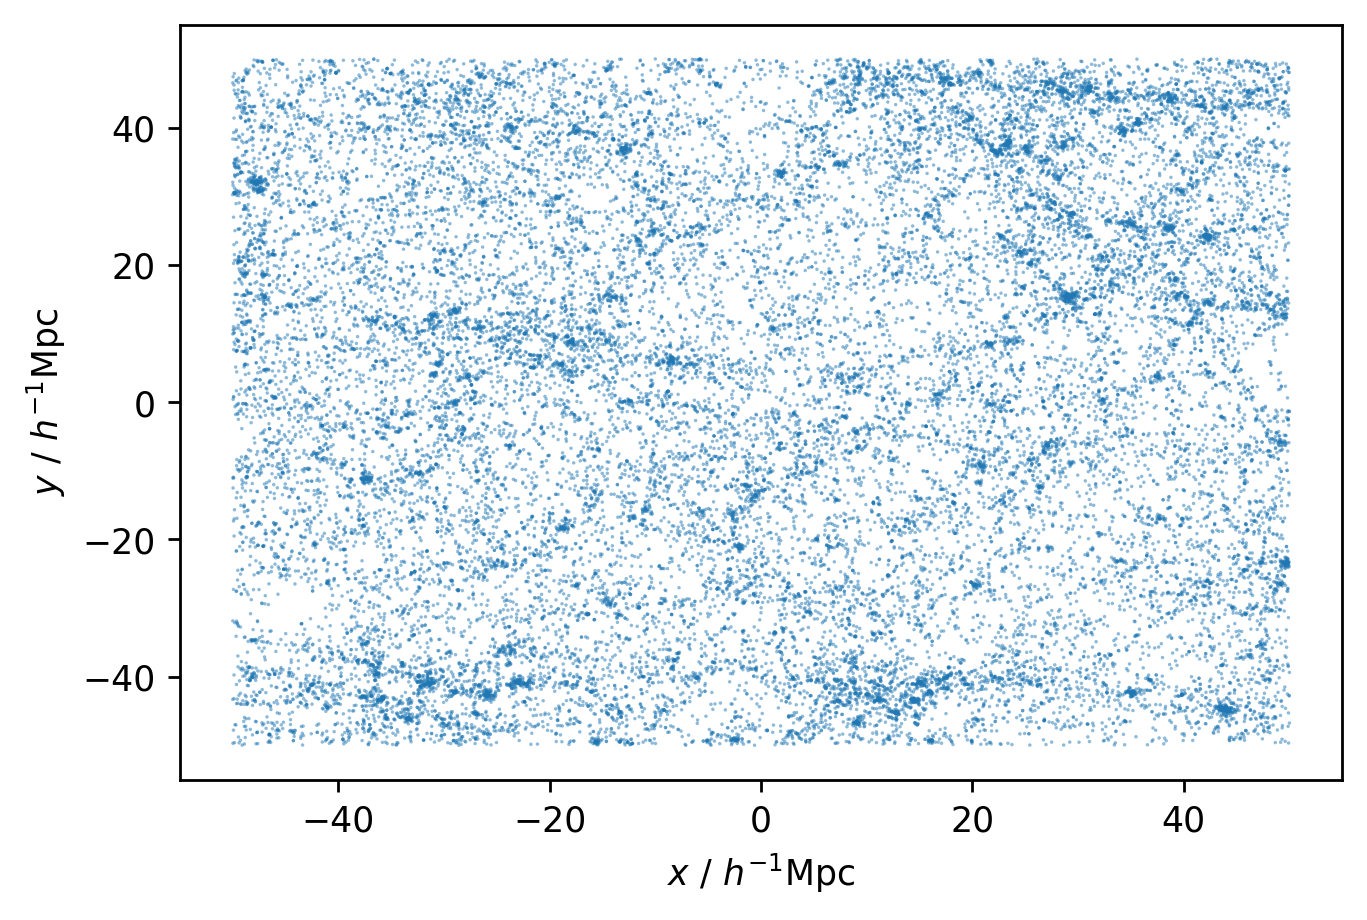

In [228]:
# narrow slice in z-direction
if not dryrun:
    keep = np.absolute(abacus_gold['CARTESIAN_Z']) < 1
    abacus_gold = abacus_gold[keep]

plt.figure(dpi=250)
plt.scatter(abacus_gold['CARTESIAN_X'], abacus_gold['CARTESIAN_Y'], s=1, edgecolor="none", alpha=0.5)
plt.xlabel(r"$x~/~h^{-1}\mathrm{Mpc}$")
plt.ylabel(r"$y~/~h^{-1}\mathrm{Mpc}$")
#plt.xlim(-1000,1000)
#plt.ylim(-1000,1000)
plt.show()

In [229]:
fpath = fpath.replace('gold', 'gold_padded')
fpath

'/global/cscratch1/sd/ldrm11/norberg/GAMA4/abacus_gold_padded_dryrun.fits'

In [230]:
abacus_gold_padded = Table.read(fpath)
abacus_gold_padded

CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,DETMAG,GMR,GALTYPE,REP_GAL
float64,float64,float64,float64,float64,int32,int64
-49.817718505859375,-49.61811828613281,32.986026763916016,-19.13434520849353,0.5035929761346656,0,0
-49.96013259887695,-49.7046012878418,33.12670135498047,-19.99488170932353,0.4683130026533947,0,0
-49.912437438964844,-47.793983459472656,24.6711368560791,-19.751710530814762,0.7371047064421957,0,0
-49.97426986694336,-43.30756378173828,27.834810256958008,-19.106823130349575,0.4679927246539698,0,0
-49.85676574707031,-39.754695892333984,-19.8656063079834,-18.271352069909977,0.23697789821150828,0,0
-49.97376251220703,-31.873416900634766,-43.020999908447266,-18.408083971288047,0.35079868874493403,0,0
-49.90583038330078,-27.293285369873047,-31.811431884765625,-19.416213798585563,0.8996529831111643,0,0
-49.83670425415039,-17.01017189025879,-20.26968765258789,-20.1513146785038,0.9116867330497159,0,0
-49.90540313720703,-17.321521759033203,44.048683166503906,-19.327904321865784,0.4989875973220167,0,0


In [231]:
max(abacus_gold_padded['CARTESIAN_X'])

59.98504954171445

In [232]:
edge = (abacus_gold_padded['REP_GAL'] == 1)

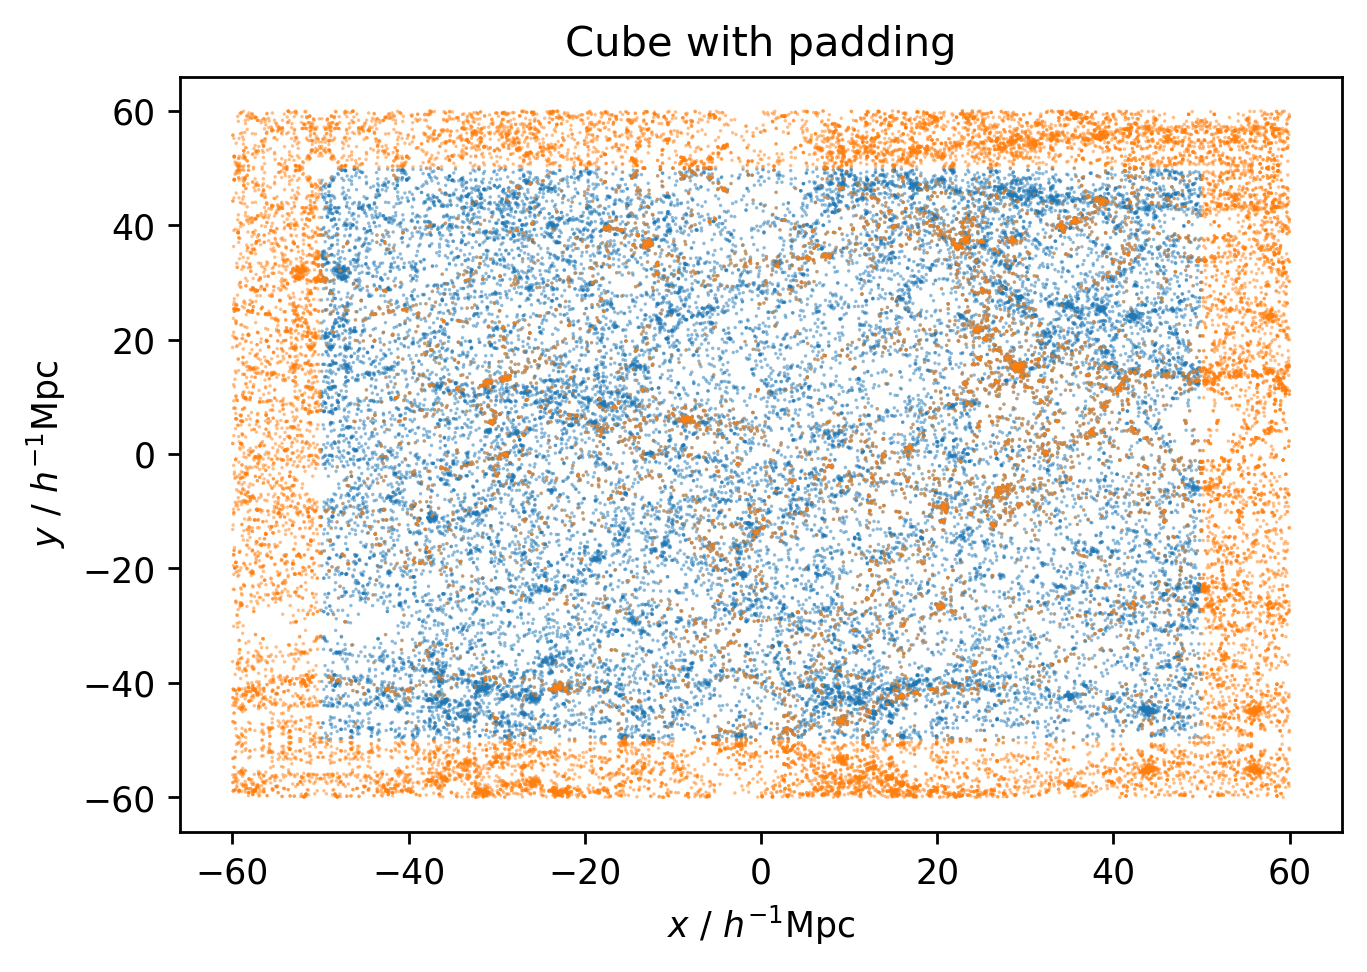

In [233]:
# narrow slice in z-direction
if not dryrun:
    keep = np.absolute(abacus_gold_padded['CARTESIAN_Z']) < 1
    abacus_gold_padded = abacus_gold_padded[keep]

plt.figure(dpi=250)
plt.scatter(abacus_gold_padded[~edge]['CARTESIAN_X'], abacus_gold_padded[~edge]['CARTESIAN_Y'], s=1, edgecolor="none", alpha=0.5)
plt.scatter(abacus_gold_padded[edge]['CARTESIAN_X'], abacus_gold_padded[edge]['CARTESIAN_Y'], s=1, edgecolor="none", alpha=0.5)

plt.xlabel(r"$x~/~h^{-1}\mathrm{Mpc}$")
plt.ylabel(r"$y~/~h^{-1}\mathrm{Mpc}$")
#plt.xlim(-1000,1000)
#plt.ylim(-1000,1000)
plt.title('Cube with padding')
plt.show()

(array([   7.,   15.,   35.,  102.,  166.,  328.,  502.,  671.,  940.,
        1206., 1489., 1851., 2092., 2376., 2675., 2981., 3330., 3400.,
        3762., 3855.]),
 array([-22.76494374, -22.52670391, -22.28846408, -22.05022425,
        -21.81198442, -21.57374459, -21.33550476, -21.09726493,
        -20.8590251 , -20.62078528, -20.38254545, -20.14430562,
        -19.90606579, -19.66782596, -19.42958613, -19.1913463 ,
        -18.95310647, -18.71486664, -18.47662682, -18.23838699,
        -18.00014716]),
 [<matplotlib.patches.Polygon at 0x1554beeb4e80>])

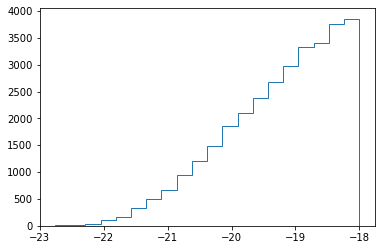

In [234]:
plt.hist(abacus_gold_padded[~edge]['DETMAG'], bins=20, histtype='step')

In [235]:
dat = abacus_gold_padded

In [236]:
# calculate abs. mag (add e-correction)

Q = 0.97
z_ref = 0.1
#dat['DDPMALL_0P1'] = dat['DETMAG'] + Q*(dat['ZSURV'] - z_ref)

In [237]:
# Define DDP galaxies
# Currently assume selection in abs_mag only; WARNING, not e-corrected

tmr_DDP1       = [-21.8, -20.1]

inddp = (dat['DETMAG'] >= tmr_DDP1[0]) & (dat['DETMAG'] <= tmr_DDP1[1])
ddp = dat[inddp]

In [238]:
fields = 'A'
dat['FIELD'] = 'A'

In [239]:
points       = np.c_[dat['CARTESIAN_X'], dat['CARTESIAN_Y'], dat['CARTESIAN_Z']]
points       = np.array(points, copy=True)

kd_tree_all  = KDTree(points)

# ----  Calculate DDPX_N8 for each gama gold galaxy.  ----
for idx in range(1):
    # Calculate DDP1/2/3 N8 for all gold galaxies.
    ddp_idx      = idx + 1

    dat['DDP{:d}_N8'.format(ddp_idx)] = -99
    
    for field in fields:
        print('Building tree for DDP {} and field {}'.format(ddp_idx, field))

        in_field      = dat['FIELD'] == field
        dat_field     = dat[in_field]

        # TODO / HACK: NO DDP Selection
        #ddp           = dat_field[dat_field['DDP'][:,idx] == 1]
        ddp = ddp
        
        points_ddp    = np.c_[ddp['CARTESIAN_X'], ddp['CARTESIAN_Y'], ddp['CARTESIAN_Z']]
        points_ddp    = np.array(points_ddp, copy=True)
        
        kd_tree_ddp   = KDTree(points_ddp)

        print('Querying tree for DDP {}'.format(ddp_idx))

        indexes_ddp   = kd_tree_all.query_ball_tree(kd_tree_ddp, r=8.)

        counts        = np.array([len(idx) for idx in indexes_ddp]) 

        dat['DDP{:d}_N8'.format(ddp_idx)][in_field] = counts[in_field] 

Building tree for DDP 1 and field A
Querying tree for DDP 1


In [240]:
# assume fillfactor = 1
dat['FILLFACTOR'] = 1

In [241]:
dat.meta['DDP1_VZ']   = (50*2)**3 # for dryrun

dat.meta['DDP{}_NGAL'.format(1)] = np.count_nonzero(ddp) 
dat.meta['DDP{}_DENS'.format(1)] = np.count_nonzero(ddp) / dat.meta['DDP{}_VZ'.format(1)] 

In [242]:
def gen_delta8(dat, ddp=1):
    # TODO: import radius in
    dat.meta['VOL8']   = (4./3.)*np.pi*(8.**3.)
    dat['DDP1_DELTA8'] = ((dat['DDP{}_N8'.format(ddp)] / (dat.meta['VOL8'] * dat.meta['DDP{}_DENS'.format(ddp)]) / dat['FILLFACTOR'])) - 1. 

In [243]:
gen_delta8(abacus_gold_padded, ddp=1)

Text(0, 0.5, 'N')

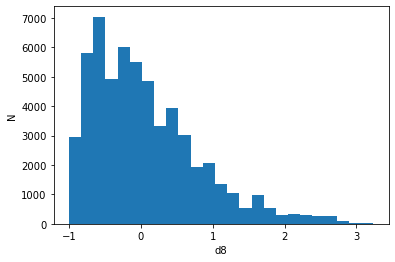

In [244]:
plt.hist(dat['DDP1_DELTA8'], bins=25)
plt.xlabel('d8')
plt.ylabel('N')

In [245]:
dat.dtype.names

('CARTESIAN_X',
 'CARTESIAN_Y',
 'CARTESIAN_Z',
 'DETMAG',
 'GMR',
 'GALTYPE',
 'REP_GAL',
 'FIELD',
 'DDP1_N8',
 'FILLFACTOR',
 'DDP1_DELTA8')

Text(0, 0.5, 'd8')

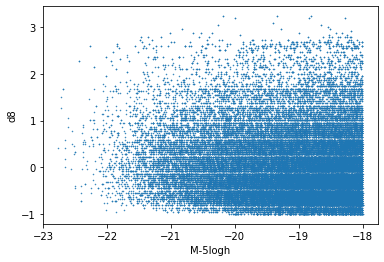

In [249]:
plt.scatter(dat['DETMAG'], dat['DDP1_DELTA8'], s=0.25)
plt.xlabel('M-5logh')
plt.ylabel('d8')

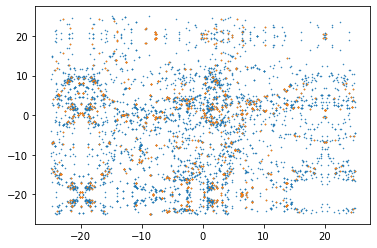

In [194]:
plt.scatter(dat['CARTESIAN_X'], dat['CARTESIAN_Y'], s=0.25)
plt.scatter(ddp['CARTESIAN_X'], ddp['CARTESIAN_Y'], s=0.5)

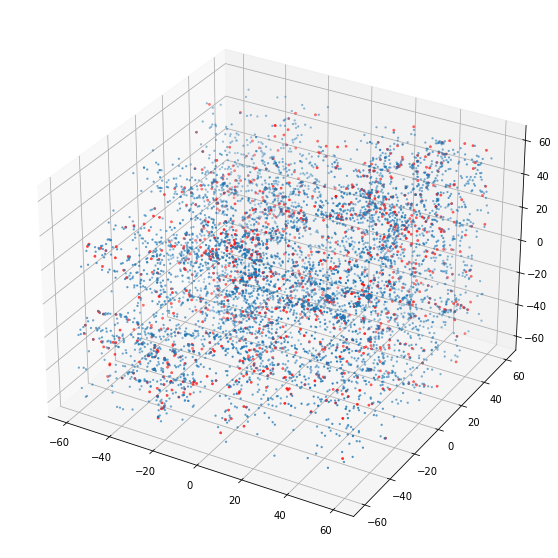

In [264]:
fig = plt.figure(figsize=(10,10))
ax  = fig.add_subplot(projection='3d')

pos = np.c_[dat['CARTESIAN_X'], dat['CARTESIAN_Y'], dat['CARTESIAN_Z']]
pos_ddp = np.c_[ddp['CARTESIAN_X'], ddp['CARTESIAN_Y'], ddp['CARTESIAN_Z']]

ax.scatter(pos[::10, 0],\
           pos[::10, 1],\
           pos[::10, 2],\
           marker='.',\
           lw=0.0)

ax.scatter(pos_ddp[::10, 0],\
           pos_ddp[::10, 1],\
           pos_ddp[::10, 2],\
           marker='.',\
           color = 'red',\
           lw=0.5)

Text(0.5, 1.0, 'DDPs')

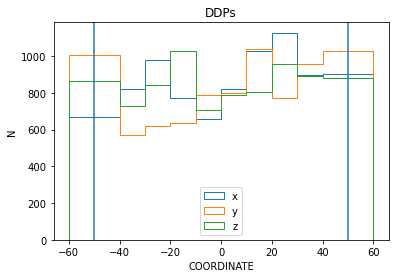

In [261]:
# check ddp_density constant in x-direction:

bins = np.arange(-boundary-pad, boundary+pad+0.1, boundary/5)

plt.hist(ddp['CARTESIAN_X'], bins=bins, histtype='step', label='x')
plt.hist(ddp['CARTESIAN_Y'], bins=bins, histtype='step', label='y')
plt.hist(ddp['CARTESIAN_Z'], bins=bins, histtype='step', label='z')

plt.axvline(-boundary)
plt.axvline(boundary)
plt.legend()
plt.xlabel('COORDINATE')
plt.ylabel('N')
plt.title('DDPs')

Text(0.5, 1.0, 'All')

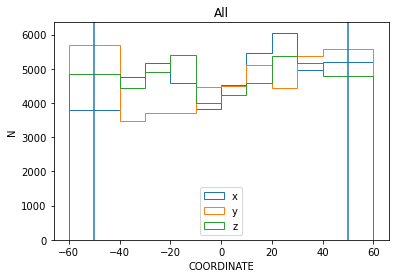

In [262]:
plt.hist(dat['CARTESIAN_X'], bins=bins, histtype='step', label='x')
plt.hist(dat['CARTESIAN_Y'], bins=bins, histtype='step', label='y')
plt.hist(dat['CARTESIAN_Z'], bins=bins, histtype='step', label='z')

plt.axvline(-boundary)
plt.axvline(boundary)
plt.legend()
plt.xlabel('COORDINATE')
plt.ylabel('N')
plt.title('All')

In [260]:
boundary = 50
pad = 10

In [271]:
dat['VMAX'] = 1
dat['MCOLOR_0P0'] = dat['DETMAG']

dat.meta['FORCE_VOL'] = (50*2)**3 # for dryrun


In [273]:
from   cosmo           import  volcom
from   schechter       import  named_schechter

In [282]:
dat_LF = dat[~edge]

In [283]:
result = lumfn(dat_LF)




Solving for Ms: [-23.  -22.8 -22.6 -22.4 -22.2 -22.  -21.8 -21.6 -21.4 -21.2 -21.  -20.8
 -20.6 -20.4 -20.2 -20.  -19.8 -19.6 -19.4 -19.2 -19.  -18.8 -18.6 -18.4
 -18.2 -18.  -17.8 -17.6 -17.4 -17.2 -17.  -16.8 -16.6 -16.4 -16.2 -16. ]
      MEDIAN_M             MEAN_M       ...     REF_RATIO     
------------------- ------------------- ... ------------------
              -22.9               -22.9 ...                0.0
              -22.7               -22.7 ...                0.0
-22.688161818348362 -22.691575479333682 ...  792200.0214744841
  -22.5027768455281 -22.495692383836076 ...  533663.0475628168
 -22.26898106255763 -22.287076414923735 ...  564166.3830678441
-22.059753197798493  -22.07008299134401 ...   562300.616957171
-21.885735943769454  -21.89019700515741 ...  759067.5288591039
-21.697481387761314  -21.69848673368193 ...  773223.9206384929
 -21.49284222949347 -21.492518500805737 ...  933069.7349507485
-21.284914826979506 -21.291296196614944 ...  871922.7119157786
      

/tmp/ipykernel_9752/1593111811.py:1: RuntimeWarning: divide by zero encountered in log10
  plt.plot(result['MEDIAN_M'], np.log10(result['PHI_IVMAX']))


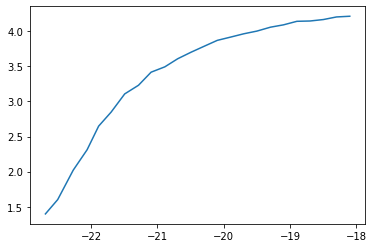

In [284]:
plt.plot(result['MEDIAN_M'], np.log10(result['PHI_IVMAX']))



Solving for Ms: [-23.  -22.8 -22.6 -22.4 -22.2 -22.  -21.8 -21.6 -21.4 -21.2 -21.  -20.8
 -20.6 -20.4 -20.2 -20.  -19.8 -19.6 -19.4 -19.2 -19.  -18.8 -18.6 -18.4
 -18.2 -18.  -17.8 -17.6 -17.4 -17.2 -17.  -16.8 -16.6 -16.4 -16.2 -16. ]
      MEDIAN_M             MEAN_M       ...     REF_RATIO     
------------------- ------------------- ... ------------------
              -22.9               -22.9 ...                0.0
              -22.7               -22.7 ...                0.0
 -22.66528940888928 -22.680126352346477 ...  1565193.000591387
-22.496885907095358 -22.478813049060193 ...  982492.5227555594
-22.267628909441427  -22.28564801658828 ...  1077003.854060156
 -22.06388430792063  -22.07329997547473 ...  964581.2566549939
-21.885735943769454  -21.88917946337076 ... 1451465.0479081895
-21.691507503169934 -21.694694053627092 ...  1302875.597869578
-21.491414336984025  -21.49113632500343 ...  1683930.432949922
 -21.28497386618524  -21.29029310953033 ... 1632245.5848552384
      

/tmp/ipykernel_9752/4114592759.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.plot(result['MEDIAN_M'], np.log10(result['PHI_IVMAX']))




Solving for Ms: [-23.  -22.8 -22.6 -22.4 -22.2 -22.  -21.8 -21.6 -21.4 -21.2 -21.  -20.8
 -20.6 -20.4 -20.2 -20.  -19.8 -19.6 -19.4 -19.2 -19.  -18.8 -18.6 -18.4
 -18.2 -18.  -17.8 -17.6 -17.4 -17.2 -17.  -16.8 -16.6 -16.4 -16.2 -16. ]
      MEDIAN_M             MEAN_M       ...     REF_RATIO     
------------------- ------------------- ... ------------------
              -22.9               -22.9 ...                0.0
              -22.7               -22.7 ...                0.0
 -22.66528940888928 -22.680126352346477 ...  782596.5002956935
-22.496885907095358 -22.478813049060193 ...  491246.2613777797
-22.267628909441427  -22.28564801658828 ...   538501.927030078
 -22.06388430792063  -22.07329997547473 ... 482290.62832749693
-21.885735943769454  -21.88917946337076 ...  725732.5239540947
-21.691507503169934 -21.694694053627092 ...   651437.798934789
-21.491414336984025  -21.49113632500343 ...   841965.216474961
 -21.28497386618524  -21.29029310953033 ...  816122.7924276192
      

/tmp/ipykernel_9752/4114592759.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.plot(result['MEDIAN_M'], np.log10(result['PHI_IVMAX']))




Solving for Ms: [-23.  -22.8 -22.6 -22.4 -22.2 -22.  -21.8 -21.6 -21.4 -21.2 -21.  -20.8
 -20.6 -20.4 -20.2 -20.  -19.8 -19.6 -19.4 -19.2 -19.  -18.8 -18.6 -18.4
 -18.2 -18.  -17.8 -17.6 -17.4 -17.2 -17.  -16.8 -16.6 -16.4 -16.2 -16. ]
      MEDIAN_M             MEAN_M       ...     REF_RATIO     
------------------- ------------------- ... ------------------
              -22.9               -22.9 ...                0.0
              -22.7               -22.7 ...                0.0
 -22.66528940888928 -22.680126352346477 ...  521731.0001971291
-22.496885907095358 -22.478813049060193 ... 327497.50758518645
-22.267628909441427  -22.28564801658828 ... 359001.28468671866
 -22.06388430792063  -22.07329997547473 ... 321527.08555166464
-21.885735943769454  -21.88917946337076 ... 483821.68263606325
-21.691507503169934 -21.694694053627092 ...   434291.865956526
-21.491414336984025  -21.49113632500343 ...  561310.1443166407
 -21.28497386618524  -21.29029310953033 ...  544081.8616184129
      

/tmp/ipykernel_9752/4114592759.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.plot(result['MEDIAN_M'], np.log10(result['PHI_IVMAX']))




Solving for Ms: [-23.  -22.8 -22.6 -22.4 -22.2 -22.  -21.8 -21.6 -21.4 -21.2 -21.  -20.8
 -20.6 -20.4 -20.2 -20.  -19.8 -19.6 -19.4 -19.2 -19.  -18.8 -18.6 -18.4
 -18.2 -18.  -17.8 -17.6 -17.4 -17.2 -17.  -16.8 -16.6 -16.4 -16.2 -16. ]
      MEDIAN_M             MEAN_M       ...     REF_RATIO     
------------------- ------------------- ... ------------------
              -22.9               -22.9 ...                0.0
              -22.7               -22.7 ...                0.0
 -22.66528940888928 -22.680126352346477 ... 391298.25014784676
-22.496885907095358 -22.478813049060193 ... 245623.13068888985
-22.267628909441427  -22.28564801658828 ...   269250.963515039
 -22.06388430792063  -22.07329997547473 ... 241145.31416374847
-21.885735943769454  -21.88917946337076 ... 362866.26197704737
-21.691507503169934 -21.694694053627092 ...  325718.8994673945
-21.491414336984025  -21.49113632500343 ...  420982.6082374805
 -21.28497386618524  -21.29029310953033 ...  408061.3962138096
      

/tmp/ipykernel_9752/4114592759.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.plot(result['MEDIAN_M'], np.log10(result['PHI_IVMAX']))


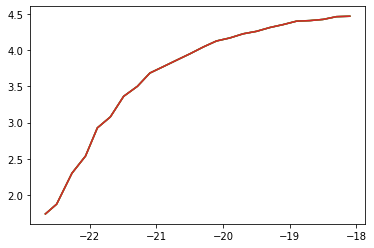

In [285]:
for d8 in [0, 1, 2, 3]:
    result = lumfn(dat, d8=d8)
    plt.plot(result['MEDIAN_M'], np.log10(result['PHI_IVMAX']))

In [267]:
def lumfn(dat, Ms=None, Mcol='MCOLOR_0P0', jackknife=None, opath=None, d8=None):
    if type(jackknife) == np.ndarray:
        for jk in jackknife:
            lumfn(dat, Ms=Ms, Mcol=Mcol, jackknife=int(jk), opath=opath)

        return 0
    
    elif type(jackknife) == int:
        pass

    elif jackknife is None:
        pass

    else:
        raise ValueError('Unsupported jackknife of type {}'.format(type(jackknife)))

    if Ms == None:
        # np.arange(-25.5, -15.5, 0.2) 
        Ms = np.linspace(-23.,  -16.,  36)
                
    dat   = Table(dat, copy=True)

    # If values in x are beyond the bounds of bins, 0 or len(bins) is returned as appropriate.
    keep  = (dat[Mcol] >= Ms.min()) & (dat[Mcol] <= Ms.max())
    dat   = dat[keep]

    dvmax = dat['VMAX'].data
    vol   = dat.meta['FORCE_VOL']
    
    # default:  bins[i-1] <= x < bins[i]
    
    if jackknife is not None:
        print('Solving for jack knife {}'.format(jackknife))

        jk_volfrac = dat.meta['JK_VOLFRAC']

        vol       *= jk_volfrac

        dat        = dat[dat['JK'] != f'JK{jackknife}']
        dvmax      = jk_volfrac * dat['VMAX'].data
    
    idxs   = np.digitize(dat[Mcol], bins=Ms)
    result = []

    print('\n\nSolving for Ms: {}'.format(Ms))

    ds     = np.diff(Ms)

    ds     = np.round(ds, decimals=4)
    dM     = ds[0]

    assert  np.all(ds == dM)
    
    for ii, idx in enumerate(np.arange(0, len(Ms), 1)):
        sample  = dat[idxs == idx]
        nsample = len(sample)

        # print(sample)
        
        vmax    = dvmax[idxs == idx]

        ivmax   = 1. / vmax
        ivmax2  = 1. / vmax**2.

        if nsample > 0:
            median = np.median(sample[Mcol])
            mean   = np.mean(sample[Mcol])
            wmean  = np.average(sample[Mcol], weights=ivmax) 
            mid    = Ms[ii] + dM/2.

        else:
            median = Ms[ii] + dM/2.
            mean   = median
            wmean  = mean
            mid    = mean

        # print(median)

        if len(vmax) == 0:
            median_vmax = 0

        else:
            median_vmax = np.median(vmax) / vol

        result.append([median,\
                       mean,\
                       mid,\
                       wmean,\
                       nsample / dM / vol,\
                       np.sqrt(nsample) / dM / vol,\
                       np.sum(ivmax) / dM,\
                       np.sqrt(np.sum(ivmax2)) / dM,\
                       nsample,
                       median_vmax])

    names  = ['MEDIAN_M', 'MEAN_M', 'MID_M', 'IVMAXMEAN_M', 'PHI_N', 'PHI_N_ERROR', 'PHI_IVMAX', 'PHI_IVMAX_ERROR', 'N', 'V_ON_VMAX']

    result = Table(np.array(result), names=names)
    result['VALID'] = result['N'] >= 5.
    result['REF_SCHECHTER']       = named_schechter(result['MEDIAN_M'], named_type='TMR')

    if d8 != None:
        # TODO HARDCODE 0.007                                                                                                                                                                             
        result['REF_SCHECHTER']  *= (1. + d8) / (1. + 0.007)
        result.meta['DDP1_D8']    = d8     

    result['REF_RATIO']           = result['PHI_IVMAX'] / result['REF_SCHECHTER']

    result.meta.update(dat.meta)

    result.pprint()
    
    result.meta['MS']             = str(['{:.4f}'.format(x) for x in Ms.tolist()])
    result.meta['FORCE_VOL']      = vol
    result.meta['ABSMAG_DEF']     = Mcol
    result.meta['EXTNAME']        = 'LUMFN'
    
    if jackknife is not None:        
        result.meta['EXTNAME']    = 'LUMFN_JK{}'.format(jackknife)
        result.meta['RENORM']     = 'FALSE'
        result.meta['JK_VOLFRAC'] = dat.meta['JK_VOLFRAC']
        result.meta['NJACK']      = dat.meta['NJACK']
        result                    = fits.convenience.table_to_hdu(result)

        with fits.open(opath, mode='update') as hdulist:
            hdulist.append(result)
            hdulist.flush()  
            hdulist.close()

        cmds   = []
        cmds.append(f'chgrp desi {opath}')
        cmds.append(f'chmod  700 {opath}')

        for cmd in cmds:
            output = subprocess.check_output(cmd, shell=True)

            print(cmd, output)

        return  0

    else:
        return  result 